In [26]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [27]:
# Creating Pandas dataframe
myopia = pd.read_csv('myopia.csv')

In [28]:
# Displaying the first five rows of the dataframe
print(myopia.head())

   ID  STUDYYEAR  MYOPIC  AGE  GENDER  SPHEQ     AL    ACD     LT    VCD  \
0   1       1992       1    6       1 -0.052  21.89  3.690  3.498  14.70   
1   2       1995       0    6       1  0.608  22.38  3.702  3.392  15.29   
2   3       1991       0    6       1  1.179  22.49  3.462  3.514  15.52   
3   4       1990       1    6       1  0.525  22.20  3.862  3.612  14.73   
4   5       1995       0    5       0  0.697  23.29  3.676  3.454  16.16   

   SPORTHR  READHR  COMPHR  STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  
0       45       8       0        0    10         34      1      1  
1        4       0       1        1     7         12      1      1  
2       14       0       2        0    10         14      0      0  
3       18      11       0        0     4         37      0      1  
4       14       0       0        0     4          4      1      0  


In [29]:
# Dataset information
myopia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         618 non-null    int64  
 1   STUDYYEAR  618 non-null    int64  
 2   MYOPIC     618 non-null    int64  
 3   AGE        618 non-null    int64  
 4   GENDER     618 non-null    int64  
 5   SPHEQ      618 non-null    float64
 6   AL         618 non-null    float64
 7   ACD        618 non-null    float64
 8   LT         618 non-null    float64
 9   VCD        618 non-null    float64
 10  SPORTHR    618 non-null    int64  
 11  READHR     618 non-null    int64  
 12  COMPHR     618 non-null    int64  
 13  STUDYHR    618 non-null    int64  
 14  TVHR       618 non-null    int64  
 15  DIOPTERHR  618 non-null    int64  
 16  MOMMY      618 non-null    int64  
 17  DADMY      618 non-null    int64  
dtypes: float64(5), int64(13)
memory usage: 87.0 KB


In [30]:
# Renaming the column 'DADMY' to 'DADDY'
myopia.rename(columns={'DADMY': 'DADDY'}, inplace=True)

# Displaying comumn names
list(myopia.columns)

['ID',
 'STUDYYEAR',
 'MYOPIC',
 'AGE',
 'GENDER',
 'SPHEQ',
 'AL',
 'ACD',
 'LT',
 'VCD',
 'SPORTHR',
 'READHR',
 'COMPHR',
 'STUDYHR',
 'TVHR',
 'DIOPTERHR',
 'MOMMY',
 'DADDY']

In [31]:
# Checking for null values
null_values = myopia.isnull().sum()
print(null_values)

ID           0
STUDYYEAR    0
MYOPIC       0
AGE          0
GENDER       0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADDY        0
dtype: int64


In [32]:
# Checking for whitespaces
whitespace = myopia.apply(lambda x: (x == ' ').sum())
print(whitespace)

ID           0
STUDYYEAR    0
MYOPIC       0
AGE          0
GENDER       0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADDY        0
dtype: int64


In [33]:
# Dropping duplicates - if any
myopia.drop_duplicates(inplace=True)

In [34]:
# Removing ID column as it is not relevant
myopia.drop('ID', axis=1, inplace=True)

In [35]:
# Displaying the shape of the dataframe
print(myopia.shape)

(618, 17)


In [36]:
# Defining numerical columns
num_myopia = ['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR',	'READHR',	'COMPHR',	'STUDYHR',	'TVHR', 'DIOPTERHR']

# Defining categorical columns
cat_myopia = ['STUDYYEAR', 'MYOPIC', 'GENDER', 'MOMMY', 'DADDY']

In [37]:
# Summary statistics for numerical columns
summary_statistics = myopia[num_myopia].describe()
print(summary_statistics)

              AGE       SPHEQ          AL         ACD          LT         VCD  \
count  618.000000  618.000000  618.000000  618.000000  618.000000  618.000000   
mean     6.299353    0.801010   22.496780    3.578629    3.541453   15.376780   
std      0.712950    0.625918    0.680141    0.230394    0.154519    0.664183   
min      5.000000   -0.699000   19.900000    2.772000    2.960000   13.380000   
25%      6.000000    0.456250   22.040000    3.424000    3.436000   14.930000   
50%      6.000000    0.729000   22.465000    3.585000    3.542000   15.360000   
75%      6.000000    1.034000   22.970000    3.730000    3.640000   15.840000   
max      9.000000    4.372000   24.560000    4.250000    4.112000   17.300000   

          SPORTHR      READHR      COMPHR     STUDYHR        TVHR   DIOPTERHR  
count  618.000000  618.000000  618.000000  618.000000  618.000000  618.000000  
mean    11.953074    2.796117    2.105178    1.490291    8.948220   26.017799  
std      7.968296    3.068191 

In [38]:
# Displaying count distribution for categorical values
for column in cat_myopia:
    print(f"{column} value counts:")
    print(myopia[column].value_counts())
    print()

STUDYYEAR value counts:
STUDYYEAR
1990    131
1993    111
1994    103
1991     97
1992     88
1995     88
Name: count, dtype: int64

MYOPIC value counts:
MYOPIC
0    537
1     81
Name: count, dtype: int64

GENDER value counts:
GENDER
0    316
1    302
Name: count, dtype: int64

MOMMY value counts:
MOMMY
1    313
0    305
Name: count, dtype: int64

DADDY value counts:
DADDY
0    310
1    308
Name: count, dtype: int64



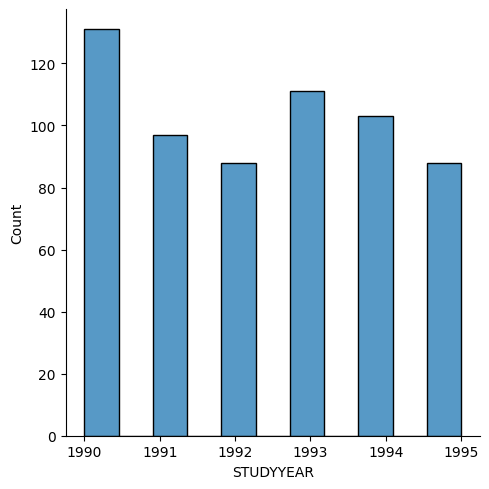

In [39]:
# Bar Graph by STUDYYEAR
sns.displot(myopia['STUDYYEAR'])

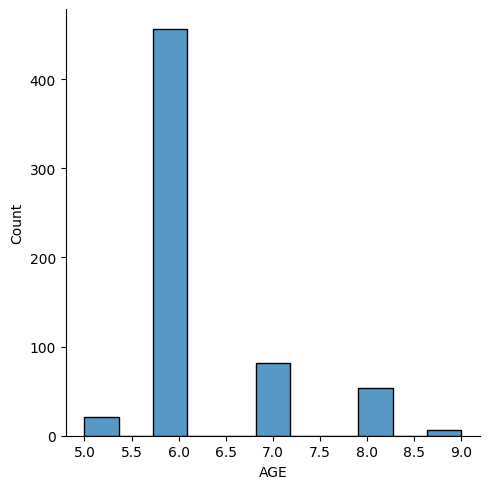

In [40]:
# Bar Graph by AGE
sns.displot(myopia['AGE'])

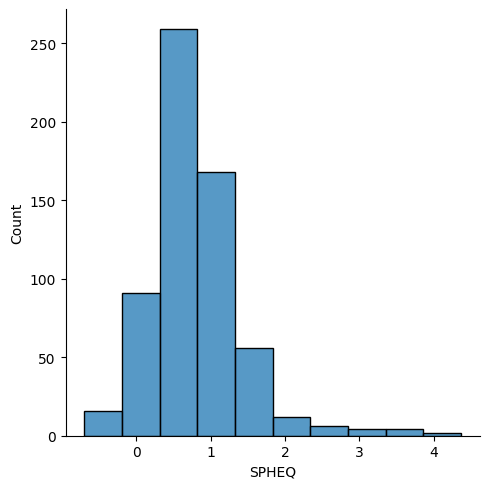

In [41]:
# Distribution plot for SPHEQ
sns.displot(myopia['SPHEQ'], bins=10)

<ipython-input-42-a1cac215a209>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(myopia['SPHEQ'])


<Axes: xlabel='SPHEQ', ylabel='Density'>

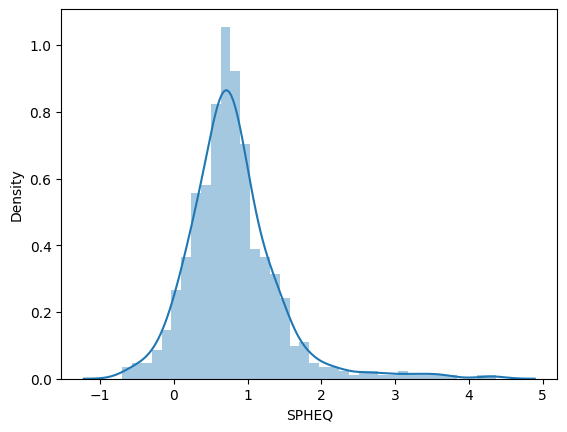

In [42]:
# Probability Density Function of SPHEQ
sns.distplot(myopia['SPHEQ'])

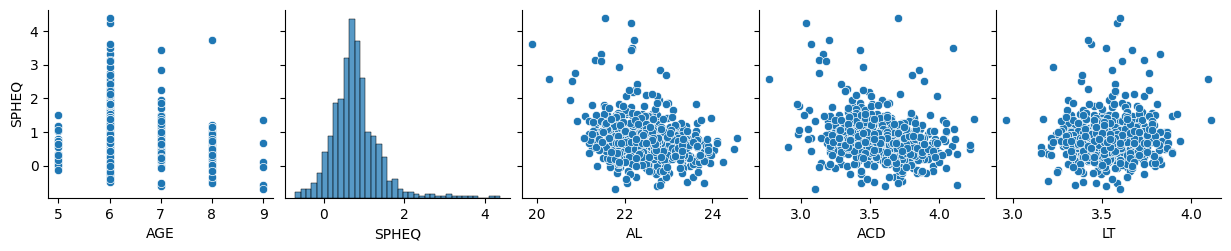

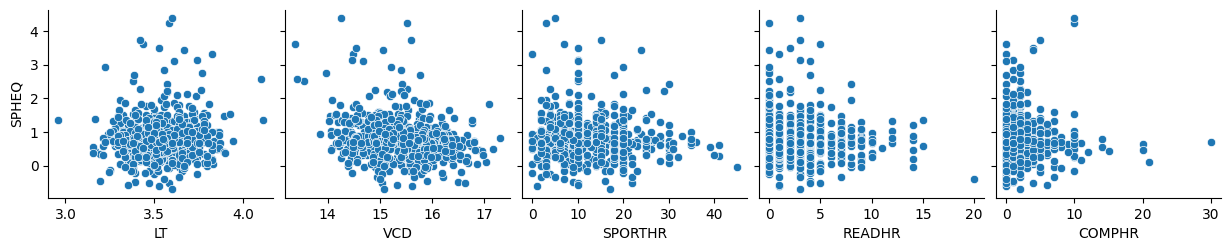

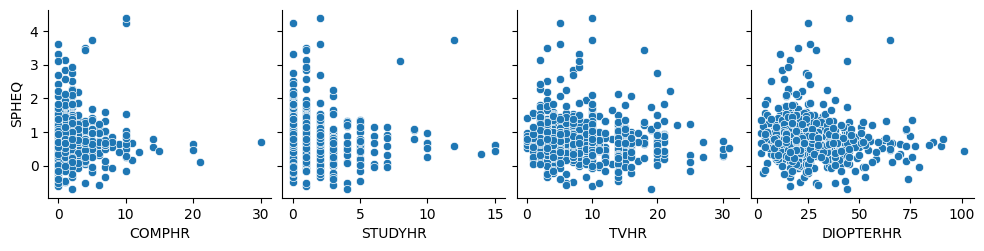

In [43]:
# Correlation plot using pairplot in relation to SPHEQ
for i in range(0, len(num_myopia), 4):
    sns.pairplot(myopia, x_vars=num_myopia[i:i+5], y_vars=['SPHEQ'])
    plt.show()

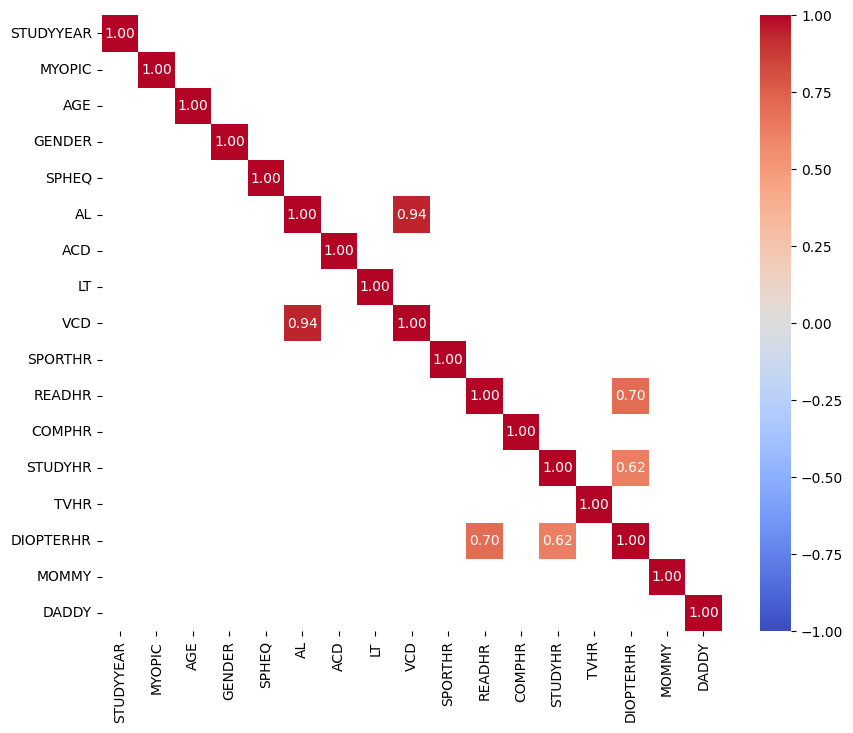

In [44]:
# Correlation Matrix Plot between all the variables

# Calculating the correlation matrix
corr_matrix = myopia.corr()

# Setting a threshold
threshold = 0.5

# Filtering the correlation matrix (keeping only correlations above the threshold or below the negative threshold)
filtered_corr_matrix = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Filling NaN values with 0 for the heatmap to plot properly
filtered_corr_matrix = filtered_corr_matrix.fillna(0)

# Drawing the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", mask=(filtered_corr_matrix == 0))

plt.show()


In [45]:
# Importing relevant libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia[num_myopia])

# Normalizing the data
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(scaled_data)

# Performing PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

# Converting de PCA result to a DataFrame for easier handling
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

print(pca_df.head())


        PC1       PC2
0  0.130135  0.280620
1 -0.158081 -0.206703
2 -0.134305 -0.103423
3  0.018398  0.179492
4 -0.137583 -0.423329


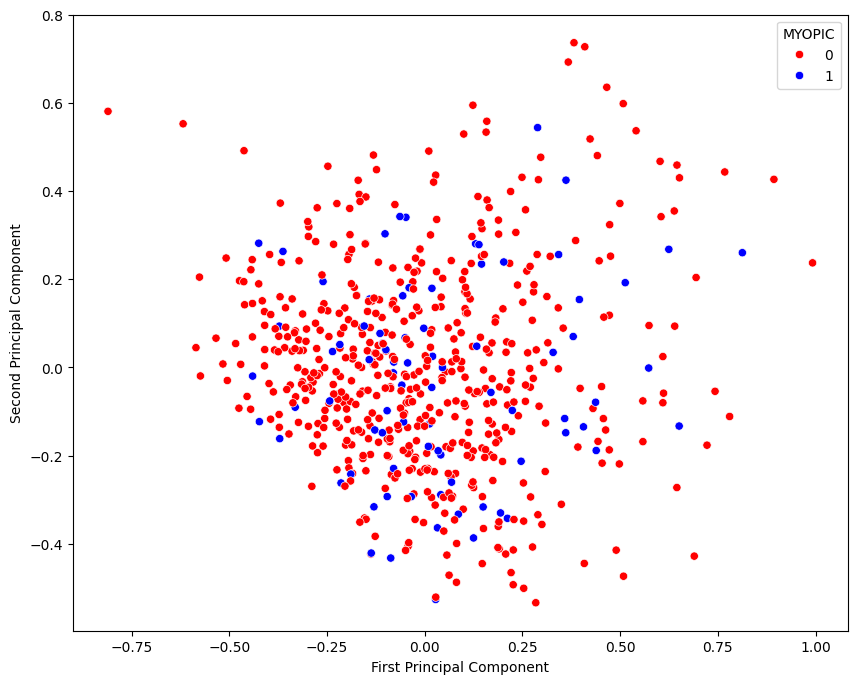

In [46]:
# Adding MYOPIC to the pca DataFrame for classification purposes
pca_df['MYOPIC'] = myopia['MYOPIC'].values

# Plotting PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='MYOPIC', palette=['red', 'blue'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

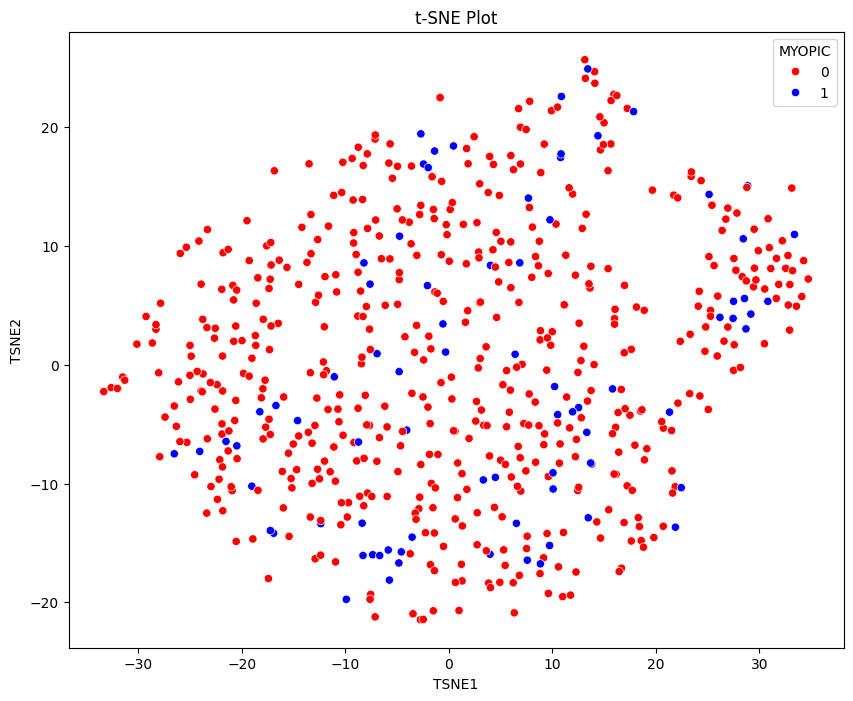

In [47]:
# Importing required library for t-SNE analysis
from sklearn.manifold import TSNE

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Creating a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['MYOPIC'] = myopia['MYOPIC'].values #Adding MYOPIC to the t-sne DataFrame for classification purposes

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='MYOPIC', data=tsne_df, palette=['red', 'blue'])
plt.title('t-SNE Plot')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

